# AM216 Final-Project

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# This may take a few minutes to run!
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

--2021-05-15 02:28:58--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   182MB/s    in 2.8s    

2021-05-15 02:29:00 (182 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=py37_0
 

In [3]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [4]:
import numpy as np
import rdkit
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import MolFromSmiles



import pandas as pd
import matplotlib.pyplot as plt
import json
import pickle
from collections import OrderedDict
import networkx as nx

from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Model
from keras.layers import Dense, concatenate, Dropout
from tensorflow.keras.models import Model
from keras import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [ ]:
import deepchem as dc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
G_PATH = './drive/MyDrive/Colab Notebooks/Drug Binding'

Mounted at /content/drive


In [ ]:
# %%capture
# !unzip data_Drug_target_binding_affinity.zip

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
import rdkit
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import MolFromSmiles

SMILES string:
O[C@@H](CNC1CCN(CC1)c2ccc(CC3SC(=O)NC3=O)cc2)c4ccc(O)c(NS(=O)(=O)c5ccccc5)c4

Original molecule:


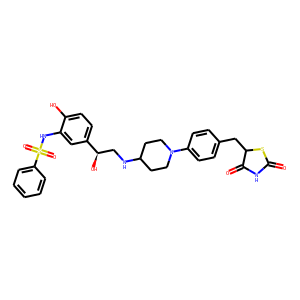

In [ ]:
smiles = []
LOCAL_PATH = '../Drug Binding'
G_PATH = './drive/MyDrive/Colab Notebooks/'
with open(G_PATH + '/data_Drug_target_binding_affinity/Sample_Ligand_List.txt', 'r') as f:
    for line in f:
        smiles.append(line[:-1])
        
print('SMILES string:')
print(smiles[0])

print('\nOriginal molecule:')
mols = MolFromSmiles(smiles[0])
Draw.MolToImage(mols)

In [ ]:
print('ECFP4')
molecule = MolFromSmiles(smiles[0])
ECFP2 = Chem.GetMorganFingerprintAsBitVect(molecule, 2).ToBitString()
ECFP2arr = np.array(list(map(int, ECFP2)))
print(ECFP2arr[:20], '...')
print(ECFP2arr.shape)

ECFP4
[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
(2048,)


In [ ]:
from deepchem.feat import RDKitDescriptors   

for descriptor in RDKitDescriptors.allowedDescriptors:
    print(descriptor)


PEOE_VSA8
VSA_EState9
SMR_VSA8
NumAromaticHeterocycles
Chi2n
MaxAbsPartialCharge
SMR_VSA5
VSA_EState7
MinAbsPartialCharge
EState_VSA11
MinEStateIndex
PEOE_VSA14
SMR_VSA7
Chi3n
BertzCT
SlogP_VSA3
NumAliphaticHeterocycles
PEOE_VSA13
HeavyAtomCount
MaxAbsEStateIndex
Chi0
MolMR
NumSaturatedCarbocycles
SlogP_VSA9
Kappa2
SlogP_VSA8
SlogP_VSA12
NumAliphaticCarbocycles
MolWt
Chi2v
Chi0v
PEOE_VSA11
PEOE_VSA3
PEOE_VSA5
Kappa1
SlogP_VSA6
TPSA
VSA_EState1
PEOE_VSA6
MolLogP
NumAromaticCarbocycles
VSA_EState10
VSA_EState5
PEOE_VSA7
HeavyAtomMolWt
SMR_VSA4
SMR_VSA1
NumRadicalElectrons
Ipc
NumRotatableBonds
SMR_VSA6
PEOE_VSA1
NumAliphaticRings
SlogP_VSA5
EState_VSA9
VSA_EState3
LabuteASA
Chi1v
MaxEStateIndex
Chi1n
Chi4v
VSA_EState2
Chi0n
Kappa3
SlogP_VSA1
PEOE_VSA2
Chi3v
EState_VSA10
PEOE_VSA12
PEOE_VSA9
EState_VSA5
EState_VSA7
SMR_VSA10
NumAromaticRings
SlogP_VSA2
RingCount
SMR_VSA9
NumHAcceptors
NumHDonors
MinPartialCharge
EState_VSA2
FractionCSP3
SlogP_VSA7
SMR_VSA3
NumValenceElectrons
SMR_VSA2
Slo

In [ ]:
dir(dc.models)

['ANIRegression',
 'AtomicConvModel',
 'BPSymmetryFunctionRegression',
 'ChemCeption',
 'DAGModel',
 'DAGTensorGraph',
 'DTNNModel',
 'DTNNTensorGraph',
 'GAN',
 'GraphConvModel',
 'GraphConvTensorGraph',
 'IRV',
 'KerasModel',
 'MPNNModel',
 'MPNNTensorGraph',
 'Model',
 'MultitaskClassifier',
 'MultitaskFitTransformRegressor',
 'MultitaskRegressor',
 'OntologyModel',
 'OntologyNode',
 'ProgressiveMultitaskClassifier',
 'ProgressiveMultitaskRegressor',
 'RobustMultitaskClassifier',
 'RobustMultitaskRegressor',
 'ScScoreModel',
 'SeqToSeq',
 'SequenceDNN',
 'Sequential',
 'SingletaskToMultitask',
 'SklearnModel',
 'Smiles2Vec',
 'TensorGraph',
 'TensorflowMultitaskIRVClassifier',
 'TextCNNModel',
 'TextCNNTensorGraph',
 'ValidationCallback',
 'WGAN',
 'WeaveModel',
 'WeaveTensorGraph',
 'XGBoostModel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'atomic_conv',
 'callbacks',
 'chemnet_models',
 'create_g

## 2. Data Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import json
import pickle
from collections import OrderedDict
import networkx as nx

In [ ]:
# for converting protein sequence to categorical format/numerical format
seq_voc = "ABCDEFGHIKLMNOPQRSTUVWXYZ"
seq_dict = {v:i for i,v in enumerate(seq_voc)}
seq_dict_len = len(seq_dict)
max_seq_len = 1000   # Note that all protein data will have the same length 1000 

def seq_to_cat(prot):  # prot: protein
    x = np.zeros(max_seq_len)
    for i, ch in enumerate(prot[:max_seq_len]): 
        x[i] = seq_dict[ch]
    return x  

# for Concordance index evaluation
def ci(y,f):
    ind = np.argsort(y)  # np.argsort Returns the indices that would sort an array.
    y = y[ind]
    f = f[ind]
    i = len(y)-1
    j = i-1
    z = 0.0
    S = 0.0
    while i > 0:
        while j >= 0:
            if y[i] > y[j]:
                z = z+1
                u = f[i] - f[j]
                if u > 0:
                    S = S + 1
                elif u == 0:
                    S = S + 0.5
            j = j - 1
        i = i - 1
        j = i - 1
    ci = S/z
    return ci if z != 0 else 0

We read in the ligands and the proteins, as well as the binding data.

In [ ]:
fpath = G_PATH + '/data_Drug_target_binding_affinity/data/kiba/'
# fpath = LOCAL_PATH + '/data_Drug_target_binding_affinity/data/kiba/'

# Read in drugs and proteins
drugs_ = json.load(open(fpath + "ligands_can.txt"), object_pairs_hook=OrderedDict)
drugs = np.array([Chem.MolToSmiles(Chem.MolFromSmiles(d),isomericSmiles=True) for d in drugs_.values()])
proteins_ = json.load(open(fpath + "proteins.txt"), object_pairs_hook=OrderedDict)
proteins = np.array(list(proteins_.values()))

# Read in affinity data
affinity = np.array(pickle.load(open(fpath + "Y","rb"), encoding='latin1'))

# Read in train/test fold  
train_fold = json.load(open(fpath + "folds/train_fold_setting1.txt"))
train_fold = [ee for e in train_fold for ee in e ]    
'''
Here all validation folds are aggregated into training set. 
If you want to train models with different architectures and/or 
optimize for model hyperparameters, we encourage you to use 5-fold 
cross validation as provided here.
'''
test_fold = json.load(open(fpath + "folds/test_fold_setting1.txt"))

# Prepare train/test data with fold indices
rows, cols = np.where(np.isnan(affinity)==False) 
drugs_tr = drugs[rows[train_fold]]    # (98545,)
proteins_tr = np.array([seq_to_cat(p) for p in proteins[cols[train_fold]]])   # (98545, 1000)
affinity_tr = affinity[rows[train_fold], cols[train_fold]]  # (98545,)

drugs_ts = drugs[rows[test_fold]] # (19709,)
proteins_ts = np.array([seq_to_cat(p) for p in proteins[cols[test_fold]]]) # (19709, 1000)
affinity_ts = affinity[rows[test_fold], cols[test_fold]]    # (19709,)

In [ ]:
print('Example of drug:{}'.format(drugs_tr[0]))
print('Example of protein:{} ...'.format(proteins_tr[0][:10]))
print('Example of affinity score:{}'.format(affinity_tr[0]))

Example of drug:O=C1c2c(c3c4ccc(O)cc4n(C4OC(CO)C(O)C(O)C4O)c3c3[nH]c4cc(O)ccc4c23)C(=O)N1NC(CO)CO
Example of protein:[11. 17.  0. 12. 12. 17. 14. 14. 17.  0.] ...
Example of affinity score:9.798970004000001


In [ ]:
# Convert to ECFP fingerprint
smileToMol = lambda x: MolFromSmiles(x)  # molecules from smiles
featurizer = dc.feat.CircularFingerprint(size=1024)

drugs_mol_tr = list(map(smileToMol, drugs_tr))
drugs_ecfp_tr = featurizer.featurize(drugs_mol_tr)
drugs_mol_ts = list(map(smileToMol, drugs_ts))
drugs_ecfp_ts = featurizer.featurize(drugs_mol_ts)

print(drugs_ecfp_tr.shape)
print(drugs_ecfp_ts.shape)

(98545, 1024)
(19709, 1024)


In [ ]:
tr_size, drug_size = drugs_ecfp_tr.shape[0], drugs_ecfp_tr.shape[1]
ts_size = drugs_ecfp_ts.shape[0]

protein_size = max_seq_len

## 3. Train a model on KIBA data


### 3.1 LSTM
Each drug and protein are represented by a 1-D vector. Although these vectors are not time series data, they have the similar format to time-series data, and we can try the time-series Models, LSTM and 1D CNN to see whether they could improve the prediction accuracy

In [ ]:
from keras import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, concatenate
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
# Prepare data for LSTM
num_train, num_drugs = drugs_ecfp_tr.shape
num_prot = proteins_tr.shape[1]
drugs_tr_reshape = drugs_ecfp_tr.reshape((num_train, num_drugs, 1))
proteins_tr_reshape = proteins_tr.reshape((num_train, num_prot, 1))
lstm_tr = np.concatenate((drugs_tr_reshape, proteins_tr_reshape), axis = 1)

In [ ]:
def lstm(num_drugs):
  lstm = Sequential()
  lstm.add(LSTM(256, input_shape=(num_drugs, 1)))
  lstm.add(Dropout(0.1))
  lstm.add(Dense(16, activation='relu'))
  return lstm

def sub_cnn(input_dim):
    cnn = Sequential() # Create sequential model
    cnn.add(Conv1D(16, 3, activation='relu', input_shape=(input_dim, 1)))
    cnn.add(MaxPooling1D(3))
    cnn.add(Flatten())
    cnn.add(Dropout(0.1))
    cnn.add(Dense(16, activation = 'linear'))
    return cnn

drug_cnn = lstm(num_drugs)
prot_cnn = sub_cnn(num_prot)
cnn_concat = concatenate([drug_cnn.output, prot_cnn.output])

x = Dense(4, activation='relu')(cnn_concat)
x = Dense(1, activation='linear')(x)

lstm = Model(inputs=[drug_cnn.input, prot_cnn.input], outputs=x)
# Show model summary
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
lstm.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_10_input (InputLayer)    (None, 1000, 1)      0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 998, 16)      64          conv1d_10_input[0][0]            
__________________________________________________________________________________________________
lstm_10_input (InputLayer)      (None, 1024, 1)      0                                            
__________________________________________________________________________________________________
max_pooling1d_10 (MaxPooling1D) (None, 332, 16)      0           conv1d_10[0][0]                  
____________________________________________________________________________________________

In [ ]:
# LSTM training takes so long time, so we don't use it.
from keras.callbacks import EarlyStopping

epochs = 10
batch_size = 256

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
train_history = lstm.fit([drugs_tr_reshape, proteins_tr_reshape], affinity_tr, 
                    validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=True)


Train on 78836 samples, validate on 19709 samples
Epoch 1/10
78836/78836 [==============================] - 271s 3ms/step - loss: 4.0797 - mean_squared_error: 4.0797 - val_loss: 0.6753 - val_mean_squared_error: 0.6753
Epoch 2/10
78836/78836 [==============================] - 261s 3ms/step - loss: 1.0008 - mean_squared_error: 1.0008 - val_loss: 0.6392 - val_mean_squared_error: 0.6392
Epoch 3/10
78836/78836 [==============================] - 259s 3ms/step - loss: 0.8422 - mean_squared_error: 0.8422 - val_loss: 0.6236 - val_mean_squared_error: 0.6236
Epoch 4/10
78836/78836 [==============================] - 263s 3ms/step - loss: 0.7356 - mean_squared_error: 0.7356 - val_loss: 0.6248 - val_mean_squared_error: 0.6248
Epoch 5/10
78836/78836 [==============================] - 261s 3ms/step - loss: 0.7046 - mean_squared_error: 0.7046 - val_loss: 0.6580 - val_mean_squared_error: 0.6580
Epoch 6/10
78836/78836 [==============================] - 262s 3ms/step - loss: 0.7131 - mean_squared_error: 

In [ ]:
import os
save_folder = f'{G_PATH}/saved_models/'
os.makedirs(save_folder, exist_ok=True)
save_path = save_folder + 'lstm_model'
lstm.save(save_path)

In [ ]:
path = './drive/MyDrive/Colab Notebooks/data_Drug_target_binding_affinity/lstm_model'
lstm_saved = tf.keras.models.load_model(path)
lstm_saved.summary()
drug_ts_reshape = drugs_ecfp_ts.reshape((drugs_ecfp_ts.shape[0], drugs_ecfp_ts.shape[1], 1))
proteins_ts_reshape = proteins_ts.reshape((proteins_ts.shape[0], proteins_ts.shape[1], 1))
print("Evaluate on test data")
results = lstm_saved.evaluate([drug_ts_reshape, proteins_ts_reshape], affinity_ts, batch_size=128)
print("test MSE loss is:", results)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_2_input (InputLayer)     [(None, 1000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 998, 16)      64          conv1d_2_input[0][0]             
__________________________________________________________________________________________________
lstm_13_input (InputLayer)      [(None, 1024, 1)]    0                                            
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 332, 16)      0           conv1d_2[0][0]                   
___________

In [ ]:
predicted_affinity = lstm_saved.predict([drug_ts_reshape, proteins_ts_reshape])
ci_score = ci(affinity_ts, predicted_affinity)
print('test CI score is:', ci_score)

### 3.2 CNN model

In [ ]:
# CNN 
from keras import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten

def sub_cnn(input_dim):
    cnn = Sequential() # Create sequential model
    cnn.add(Conv1D(16, 3, activation='relu', input_shape=(input_dim, 1)))
    cnn.add(MaxPooling1D(3))
    cnn.add(Flatten())
    cnn.add(Dropout(0.1))
    cnn.add(Dense(16, activation = 'linear'))
    return cnn
drug_cnn = sub_cnn(num_drugs)
prot_cnn = sub_cnn(num_prot)
cnn_concat = concatenate([drug_cnn.output, prot_cnn.output])

'''
cnn_drug = Sequential() # Create sequential model
cnn_drug.add(Conv1D(16, 3, activation='relu', input_shape=(num_drugs, 1)))
cnn.add(MaxPooling1D(3))

cnn_prot = Sequential()
cnn_prot.add(Conv1D(16, 3, activation='relu', input_shape=(num_prot, 1)))
cnn.add(MaxPooling1D(3))
# Concatenate
cnn = concatenate([cnn_drug.output, cnn_prot.output])
'''

cnn_concat = Dense(1024, activation='relu')(cnn_concat)
cnn_concat = Dropout(0.1)(cnn_concat)
cnn_concat = Dense(16, activation='relu')(cnn_concat)

cnn_concat = Dense(1, activation='linear')(cnn_concat)

cnn = Model(inputs=[drug_cnn.input, prot_cnn.input], outputs=cnn_concat)
# Show model summary
cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
cnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_3_input (InputLayer)     (None, 1024, 1)      0                                            
__________________________________________________________________________________________________
conv1d_4_input (InputLayer)     (None, 1000, 1)      0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 1022, 16)     64          conv1d_3_input[0][0]             
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 998, 16)      64          conv1d_4_input[0][0]             
____________________________________________________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping

epochs = 100
batch_size = 256

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
train_history = cnn.fit([drugs_tr_reshape, proteins_tr_reshape], affinity_tr, 
                    validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=True)


Train on 78836 samples, validate on 19709 samples
Epoch 1/100
78836/78836 [==============================] - 66s 834us/step - loss: 2.6518 - mean_squared_error: 2.6518 - val_loss: 0.4968 - val_mean_squared_error: 0.4968
Epoch 2/100
78836/78836 [==============================] - 65s 821us/step - loss: 0.6922 - mean_squared_error: 0.6922 - val_loss: 0.5036 - val_mean_squared_error: 0.5036
Epoch 3/100
78836/78836 [==============================] - 64s 818us/step - loss: 0.6023 - mean_squared_error: 0.6023 - val_loss: 0.4733 - val_mean_squared_error: 0.4733
Epoch 4/100
78836/78836 [==============================] - 64s 815us/step - loss: 0.5789 - mean_squared_error: 0.5789 - val_loss: 0.4322 - val_mean_squared_error: 0.4322
Epoch 5/100
78836/78836 [==============================] - 64s 812us/step - loss: 0.5364 - mean_squared_error: 0.5364 - val_loss: 0.4204 - val_mean_squared_error: 0.4204
Epoch 6/100
78836/78836 [==============================] - 64s 813us/step - loss: 0.5053 - mean_squ

In [ ]:
# save the trained model
import os
save_folder = f'{G_PATH}/saved_models/'
os.makedirs(save_folder, exist_ok=True)
save_path = save_folder + 'cnn_model'
cnn.save(save_path)

# load model
# model = keras.models.load_model(save_path)

In [ ]:
drug_ts_reshape = drugs_ecfp_ts.reshape((drugs_ecfp_ts.shape[0], drugs_ecfp_ts.shape[1], 1))
proteins_ts_reshape = proteins_ts.reshape((proteins_ts.shape[0], proteins_ts.shape[1], 1))
print("Evaluate on test data")
results = cnn.evaluate([drug_ts_reshape, proteins_ts_reshape], affinity_ts, batch_size=128)
print("test MSE loss is:", results)

Evaluate on test data
19709/19709 [==============================] - 6s 301us/step
test MSE loss is: [0.21053694547722707, 0.21053697168827057]


In [ ]:
predicted_affinity = cnn.predict([drug_ts_reshape, proteins_ts_reshape])
ci_score = ci(affinity_ts, predicted_affinity)
print('test CI score is:', ci_score)

test CI score is: 0.8394054274277895


[The original paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4364066/) obtained CI score of 0.782 and MSE of 0.411, and [random forest model](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5395521/) got 0.836 and 0.222. Can you beat them?

Both the MSE value and the CI score of the CNN model beat the original paper. Compared with the LSTM+CNN model ($0.6078$), the CNN+CNN embeddings gained a better MSE score ($0.222$). The LSTM+CNN embeddings cannot even beat the original paper. One possible reason is LSTM model prefers the text input. However, if we treat drug smiles as text data, it will lose some critical chemical information. 

## 4. Laten Space and Visualizations

### PCA for LSTM+CNN model

We visualized the embedding output of LSTM (for drugs) and CNN (for proteins) model using PCA.

In [ ]:
path = './drive/MyDrive/Colab Notebooks/data_Drug_target_binding_affinity/lstm_model'
lstm_saved = tf.keras.models.load_model(path)
lstm_saved.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_2_input (InputLayer)     [(None, 1000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 998, 16)      64          conv1d_2_input[0][0]             
__________________________________________________________________________________________________
lstm_13_input (InputLayer)      [(None, 1024, 1)]    0                                            
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 332, 16)      0           conv1d_2[0][0]                   
____________________________________________________________________________________________

**LSTM Embeddings for drugs**

In [ ]:
lstm_prob = Sequential()
lstm_prob.add(LSTM(256, input_shape=(num_drugs, 1)))
lstm_prob.add(Dropout(0.1))
lstm_prob.add(Dense(16, activation='relu'))

# Show model summary
lstm_prob.summary()
lstm_prob.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                4112      
Total params: 268,304
Trainable params: 268,304
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_prob.layers[0].set_weights(lstm_saved.layers[4].get_weights())

In [ ]:
lstm_prob.layers[1].set_weights(lstm_saved.layers[6].get_weights())

In [ ]:
lstm_prob.layers[2].set_weights(lstm_saved.layers[8].get_weights())

In [ ]:
from sklearn.decomposition import PCA

When using lstm_prob to get the output of drug embeddings, we choose to randomly select 5000 data points instead of using all 98000 data.

In [ ]:
idx = np.random.choice(drugs_tr_reshape.shape[0], 5000, replace=False)

In [ ]:
drugs_tr_reshape[idx].shape

(5000, 1024, 1)

In [ ]:
lstm_embedding = lstm_prob.predict(drugs_tr_reshape[idx])

In [ ]:
lstm_embedding.shape

(5000, 16)

In [ ]:
pca = PCA(n_components=2)
lstm_pca = pca.fit_transform(lstm_embedding)

In [ ]:
lstm_pca.shape

(5000, 2)

In [ ]:
import matplotlib.pyplot as plt

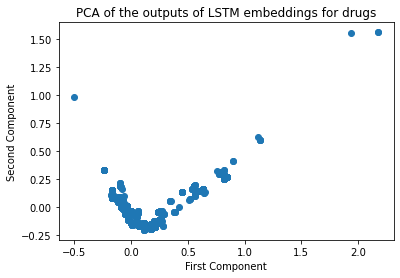

In [ ]:
plt.scatter(lstm_pca[:,0], lstm_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA of the outputs of LSTM embeddings for drugs")
plt.show()

**CNN embedding for proteins**

In [ ]:
cnn_prob = Sequential() # Create sequential model
cnn_prob.add(Conv1D(16, 3, activation='relu', input_shape=(num_prot, 1)))
cnn_prob.add(MaxPooling1D(3))
cnn_prob.add(Flatten())
cnn_prob.add(Dropout(0.1))
cnn_prob.add(Dense(16, activation = 'linear'))
# Show model summary
cnn_prob.summary()
cnn_prob.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 998, 16)           64        
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 332, 16)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 5312)              0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 5312)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 16)                85008     
Total params: 85,072
Trainable params: 85,072
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_prob.layers[0].set_weights(lstm_saved.layers[1].get_weights())

In [ ]:
cnn_prob.layers[1].set_weights(lstm_saved.layers[3].get_weights())

In [ ]:
cnn_prob.layers[2].set_weights(lstm_saved.layers[5].get_weights())

In [ ]:
cnn_prob.layers[3].set_weights(lstm_saved.layers[7].get_weights())

In [ ]:
cnn_prob.layers[4].set_weights(lstm_saved.layers[9].get_weights())

In [ ]:
cnn_embedding = cnn_prob.predict(proteins_tr_reshape)

In [ ]:
pca_2 = PCA(n_components=2)
cnn_pca = pca_2.fit_transform(cnn_embedding)

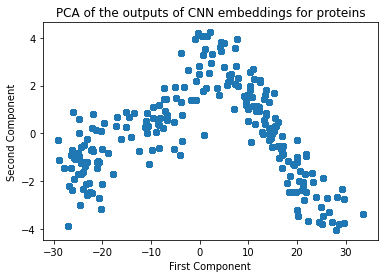

In [ ]:
plt.scatter(cnn_pca[:,0], cnn_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA of the outputs of CNN embeddings for proteins")
plt.show()

On the visualizations of PCA for LSTM embedding and CNN embedding, we can see a clear trend. The shapes of two PCAs are inversed, which indicates that the LSTM and CNN embedding may successfully extract some data characteristics. However, the CI score and MSE of this model tell a different story. 

### PCA for CNN+CNN model

For this model, we chose CNN embeddings for both drugs and proteins data. We visualized the outputs of two embeddings using PCA.

In [ ]:
path = './drive/MyDrive/Colab Notebooks/data_Drug_target_binding_affinity/cnn_model'
cnn_saved = tf.keras.models.load_model(path)
cnn_saved.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_3_input (InputLayer)     [(None, 1024, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_4_input (InputLayer)     [(None, 1000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 1022, 16)     64          conv1d_3_input[0][0]             
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 998, 16)      64          conv1d_4_input[0][0]             
____________________________________________________________________________________________

**CNN embedding for drugs**

In [ ]:
cnn_drugs = Sequential() # Create sequential model
cnn_drugs.add(Conv1D(16, 3, activation='relu', input_shape=(num_drugs, 1)))
cnn_drugs.add(MaxPooling1D(3))
cnn_drugs.add(Flatten())
cnn_drugs.add(Dropout(0.1))
cnn_drugs.add(Dense(16, activation = 'linear'))
cnn_drugs.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
cnn_drugs.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1022, 16)          64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 340, 16)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5440)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5440)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                87056     
Total params: 87,120
Trainable params: 87,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(len(cnn_drugs.layers)):
  layer = cnn_drugs.layers[i]
  cnn_drugs.layers[i].set_weights(cnn_saved.layers[2+2*i].get_weights())

In [ ]:
for l in cnn_saved.layers:
  print(l)

In [ ]:
cnn_drugs_embedding = cnn_drugs.predict(drugs_tr_reshape)

In [ ]:
pca = PCA(n_components=2)
cnn_drugs_pca = pca.fit_transform(cnn_drugs_embedding)

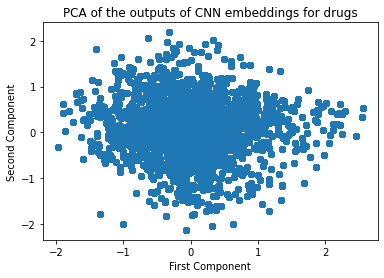

In [ ]:
plt.scatter(cnn_drugs_pca[:,0], cnn_drugs_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA of the outputs of CNN embeddings for drugs")
plt.show()

**CNN embedding for proteins**

In [ ]:
cnn_prots = Sequential() # Create sequential model
cnn_prots.add(Conv1D(16, 3, activation='relu', input_shape=(num_prot, 1)))
cnn_prots.add(MaxPooling1D(3))
cnn_prots.add(Flatten())
cnn_prots.add(Dropout(0.1))
cnn_prots.add(Dense(16, activation = 'linear'))
cnn_prots.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
cnn_prots.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 998, 16)           64        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 332, 16)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5312)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5312)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                85008     
Total params: 85,072
Trainable params: 85,072
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(len(cnn_prots.layers)):
  layer = cnn_prots.layers[i]
  cnn_prots.layers[i].set_weights(cnn_saved.layers[3+2*i].get_weights())

In [ ]:
cnn_prots_embedding = cnn_prots.predict(proteins_tr_reshape)

In [ ]:
pca = PCA(n_components=2)
cnn_prots_pca = pca.fit_transform(cnn_prots_embedding)

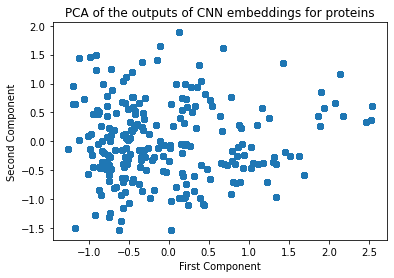

In [ ]:
plt.scatter(cnn_prots_pca[:,0], cnn_prots_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA of the outputs of CNN embeddings for proteins")
plt.show()

From the visualizations of two PCAs of CNN+CNN embeddings, we cannot find any clear trend or distributions of data in the top two components. It is very interesting that the result of this model is far better than LSTM+CNN embeddings. One of the possible reasons is that compared with using LSTM to extract the information from drug smiles, CNN is more suitable to handle this type of data.